In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


Import

In [2]:
from core.controller import Controller
from core.population import Population
from core.selector import Elitist, TournamentSelector
from core.selector import Elitist, TournamentSelector
from evolvables.planewalker import Position, FunctionEvaluator, StepMutator

Instantiate controller

In [13]:

init_pop = Population[Position]()


for i in range (100):
    init_pop.append(Position.create_random(((-5,5), (-5,5))))

def himmelblau(x:float, y:float):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

evaluator = FunctionEvaluator(himmelblau)

parentselector = Elitist(TournamentSelector[Position](1, 10))

child = Elitist(TournamentSelector[Position](1, 1))

variator = StepMutator(3)

ctrl = Controller[Position](
    population = init_pop,
    evaluator = evaluator,
    variator = variator,
    survivor_selector = parentselector,
    parent_selector = child
)

dicts = {}
for i in range(0, 1000):
    ctrl.step()
    dicts[i] = ctrl.population[0].score

print (dicts)


DBG:  Elitism: best score is -182.9081113524004 
DBG:  Elitism: best score is -152.52749863733536 
DBG:  Population progress: [100] -> (...)>PAR>(1) -> [(1)~2] -> (1) VAR (3) -> [4] -> SUR -> [5], gen 1. Best score is now -152.52749863733536 
WRN:  Variator arity inconsistent with population growth. 6 <> 4 
WRN:  Best solution is: [0.31373439028789474, 0.41101124486662977] 
DBG:  Elitism: best score is -152.52749863733536 
DBG:  Elitism: best score is -72.48643551557834 
DBG:  Population progress: [5] -> (...)>PAR>(1) -> [(1)~2] -> (1) VAR (3) -> [4] -> SUR -> [5], gen 2. Best score is now -72.48643551557834 
WRN:  Variator arity inconsistent with population growth. 6 <> 4 
WRN:  Best solution is: [-1.797482841367403, 1.6855758366647908] 
DBG:  Elitism: best score is -72.48643551557834 
DBG:  Elitism: best score is -72.48643551557834 
DBG:  Population progress: [5] -> (...)>PAR>(1) -> [(1)~2] -> (1) VAR (3) -> [4] -> SUR -> [5], gen 3. Best score is now -72.48643551557834 
WRN:  Variat

Plot everything

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


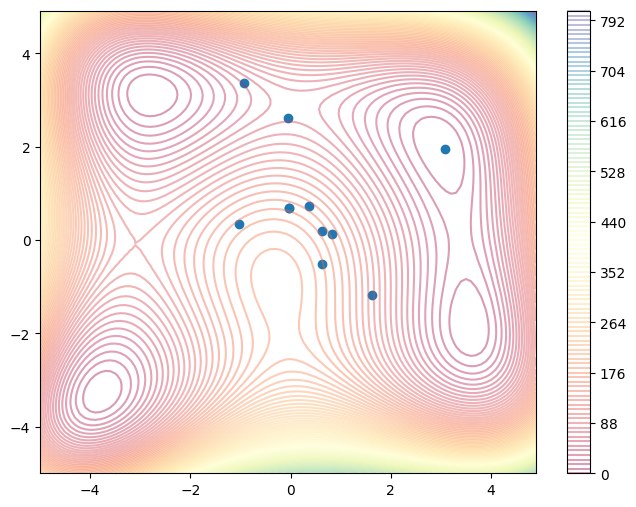

In [5]:

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = himmelblau(X, Y)
#Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(8, 6))
cs = plt.contour(X, Y, Z, levels=100, cmap='Spectral',
                 norm=colors.Normalize(vmin=Z.min(), vmax=Z.max()), alpha=0.4)
fig.colorbar(cs)


lists = [x.pos for x in ctrl.population]
xs = [x[0] for x in lists]
ys = [x[1] for x in lists]
plt.scatter(xs, ys)
plt.show()


plt.show()